In [ ]:
#Load libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
from random import randrange, uniform
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import utils

In [2]:
#Load data
Absenteeism_at_work = pd.read_excel("Absenteeism_at_work_Project.xls")

PRE PROCESSING-EXPLORATORY DATA ANALYSIS

In [3]:
#Exploratory Data Analysis
Absenteeism_at_work['Reason for absence']=Absenteeism_at_work['Reason for absence'].astype(object)
Absenteeism_at_work['Month of absence']=Absenteeism_at_work['Month of absence'].astype(object)
Absenteeism_at_work['Day of the week']=Absenteeism_at_work['Day of the week'].astype(object)
Absenteeism_at_work['Seasons']=Absenteeism_at_work['Seasons'].astype(object)
Absenteeism_at_work['Service time']=Absenteeism_at_work['Service time'].astype(object)
Absenteeism_at_work['Hit target']=Absenteeism_at_work['Hit target'].astype(object)
Absenteeism_at_work['Disciplinary failure']=Absenteeism_at_work['Disciplinary failure'].astype(object)
Absenteeism_at_work['Education']=Absenteeism_at_work['Education'].astype(object)
Absenteeism_at_work['Son']=Absenteeism_at_work['Son'].astype(object)
Absenteeism_at_work['Social drinker']=Absenteeism_at_work['Social drinker'].astype(object)
Absenteeism_at_work['Social smoker']=Absenteeism_at_work['Social smoker'].astype(object)
Absenteeism_at_work['Pet']=Absenteeism_at_work['Pet'].astype(object)

MISSING VALUE ANALYSIS

In [4]:
#Create dataframe with missing percentage
missing_val = pd.DataFrame(Absenteeism_at_work.isnull().sum())

#Reset index
missing_val = missing_val.reset_index()

#Rename variable
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})

#Calculate percentage
missing_val['Missing_percentage'] = (missing_val['Missing_percentage']/len(Absenteeism_at_work))*100

#descending order
missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)

#save output results 
missing_val.to_csv("Missing_perc_p.csv", index = False)

In [5]:
#KNN imputation
#Assigning levels to the categories
lis = []
for i in range(0, Absenteeism_at_work.shape[1]):
    #print(i)
    if(Absenteeism_at_work.iloc[:,i].dtypes == 'object'):
        Absenteeism_at_work.iloc[:,i] = pd.Categorical(Absenteeism_at_work.iloc[:,i])
        #print(marketing_train[[i]])
        Absenteeism_at_work.iloc[:,i] = Absenteeism_at_work.iloc[:,i].cat.codes 
        Absenteeism_at_work.iloc[:,i] = Absenteeism_at_work.iloc[:,i].astype('object')
        
        lis.append(Absenteeism_at_work.columns[i])

In [6]:
#replace -1 with NA to impute
for i in range(0, Absenteeism_at_work.shape[1]):
    Absenteeism_at_work.iloc[:,i] = Absenteeism_at_work.iloc[:,i].replace(-1, np.nan) 

In [7]:
#Impute with median
Absenteeism_at_work['Absenteeism time in hours'] = Absenteeism_at_work['Absenteeism time in hours'].fillna(Absenteeism_at_work['Absenteeism time in hours'].median())
Absenteeism_at_work['Body mass index'] = Absenteeism_at_work['Body mass index'].fillna(Absenteeism_at_work['Body mass index'].median())
Absenteeism_at_work['Height'] = Absenteeism_at_work['Height'].fillna(Absenteeism_at_work['Height'].median())
Absenteeism_at_work['Weight'] = Absenteeism_at_work['Weight'].fillna(Absenteeism_at_work['Weight'].median())
Absenteeism_at_work['Pet'] = Absenteeism_at_work['Pet'].fillna(Absenteeism_at_work['Pet'].median())
Absenteeism_at_work['Social smoker'] = Absenteeism_at_work['Social smoker'].fillna(Absenteeism_at_work['Social smoker'].median())
Absenteeism_at_work['Social drinker'] = Absenteeism_at_work['Social drinker'].fillna(Absenteeism_at_work['Social drinker'].median())
Absenteeism_at_work['Son'] = Absenteeism_at_work['Son'].fillna(Absenteeism_at_work['Son'].median())
Absenteeism_at_work['Education'] = Absenteeism_at_work['Education'].fillna(Absenteeism_at_work['Education'].median())
Absenteeism_at_work['Disciplinary failure'] = Absenteeism_at_work['Disciplinary failure'].fillna(Absenteeism_at_work['Disciplinary failure'].median())
Absenteeism_at_work['Hit target'] = Absenteeism_at_work['Hit target'].fillna(Absenteeism_at_work['Hit target'].median())
Absenteeism_at_work['Age'] = Absenteeism_at_work['Age'].fillna(Absenteeism_at_work['Age'].median())
Absenteeism_at_work['Service time'] = Absenteeism_at_work['Service time'].fillna(Absenteeism_at_work['Service time'].median())
Absenteeism_at_work['Distance from Residence to Work'] = Absenteeism_at_work['Distance from Residence to Work'].fillna(Absenteeism_at_work['Distance from Residence to Work'].median())
Absenteeism_at_work['Transportation expense'] = Absenteeism_at_work['Transportation expense'].fillna(Absenteeism_at_work['Transportation expense'].median())
Absenteeism_at_work['Month of absence'] = Absenteeism_at_work['Month of absence'].fillna(Absenteeism_at_work['Month of absence'].median())
Absenteeism_at_work['Reason for absence'] = Absenteeism_at_work['Reason for absence'].fillna(Absenteeism_at_work['Reason for absence'].median())
Absenteeism_at_work['Work load Average/day '] = Absenteeism_at_work['Work load Average/day '].fillna(Absenteeism_at_work['Work load Average/day '].median())



In [8]:
Absenteeism_at_work.isnull().sum()


ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [9]:
Absenteeism_at_work = Absenteeism_at_work.dropna(how='all')

In [10]:
Absenteeism_at_work.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [11]:
cnames =  ["ID", "Transportation expense", "Distance from Residence to Work", "Age", "Height", "Body mass index", "Absenteeism time in hours"]

FEATURE SELECTION

In [12]:
##Correlation analysis
#Correlation plot
df_corr = Absenteeism_at_work.loc[:,cnames]

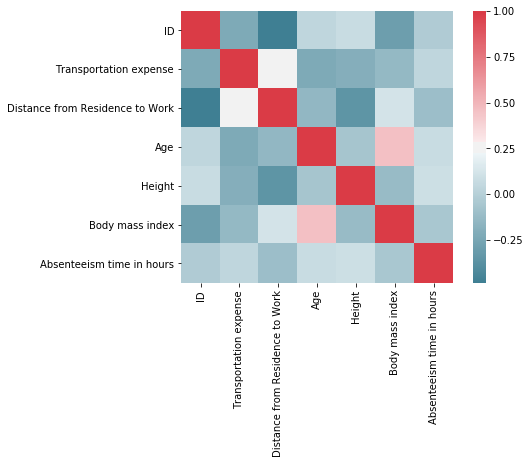

In [13]:
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.savefig('correlation.png')

In [14]:
#Chisquare test of independence
#Save categorical variables
cat_names = ["Reason for absence", "Month of absence", "Day of the week", "Seasons", "Service time", "Hit target", "Disciplinary failure", "Education", "Son", "Social drinker","Social smoker","Pet"]

In [15]:
#loop for chi square values
for i in cat_names:
    print(i)
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(Absenteeism_at_work['Absenteeism time in hours'], Absenteeism_at_work[i]))
    print(p)

Reason for absence
7.262525646531397e-126
Month of absence
2.5138924624334413e-08
Day of the week
0.003021081110471532
Seasons
1.0699164671285167e-06
Service time
0.0005117811788141375
Hit target
0.0011492200973353258
Disciplinary failure
2.811327292697691e-103
Education
0.966890372726654
Son
1.548005892620854e-08
Social drinker
0.0023832329972678858
Social smoker
0.5104529781136267
Pet
0.12306376012607578


FEATURE SCALING

In [16]:
#feature reduction
Absenteeism_at_work = Absenteeism_at_work.drop(['Weight', 'Hit target', 'Education', 'Social smoker', 'Pet'], axis=1)

In [17]:
#Nomalisation
for i in cnames:
    print(i)
    Absenteeism_at_work[i] = (Absenteeism_at_work[i] - min(Absenteeism_at_work[i]))/(max(Absenteeism_at_work[i]) - min(Absenteeism_at_work[i]))

ID
Transportation expense
Distance from Residence to Work
Age
Height
Body mass index
Absenteeism time in hours


DATA SAMPLING

In [18]:
#Divide data into train and test
train, test = train_test_split(Absenteeism_at_work, test_size=0.25, random_state=42)

MODELLING

In [19]:
# Decision Tree

In [20]:
#Decision tree for regression
fit_DT = DecisionTreeRegressor(max_depth=2).fit(train.iloc[:,0:9], train.iloc[:,9])

In [21]:
#checking for any missing valuses that has leeked in
np.where(Absenteeism_at_work.values >= np.finfo(np.float64).max)


(array([], dtype=int64), array([], dtype=int64))

In [22]:
np.isnan(Absenteeism_at_work.values.any())

False

In [23]:
test = test.fillna(train.mean())

In [24]:
#Decision tree for regression
fit_DT = DecisionTreeRegressor(max_depth=2).fit(train.iloc[:,0:15], train.iloc[:,15])

In [25]:
Absenteeism_at_work.shape

(740, 16)

In [26]:
#Apply model on test data
predictions_DT = fit_DT.predict(test.iloc[:,0:15])

In [27]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [28]:
rmse(test.iloc[:,15], predictions_DT)

0.09311520936679295

In [29]:
#rmse value using decision tree is 0.09311520936679295

In [47]:
#Divide data into train and test
X = Absenteeism_at_work.values[:, 0:15]
Y = Absenteeism_at_work.values[:,15]

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2)

In [61]:
X_test.shape

(148, 15)

In [36]:
from sklearn import preprocessing

In [37]:
label_encoder = preprocessing.LabelEncoder()

In [45]:
lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(y_train)
print(training_scores_encoded)
print(utils.multiclass.type_of_target(y_train))
print(utils.multiclass.type_of_target(y_train.astype('int')))
print(utils.multiclass.type_of_target(training_scores_encoded))

[ 4  1  2  4  3  7  2  2  3  3  1  7  7  7  2  7 14  4  1  1  1  1  7  3
  0  3  3  7  7  7  3  3  0  7  7  3  2  9  2  1  7  2 11  3  2  2  1  7
  4  3  7  7  5 10  3  3  7  2  7  7  0  7  0  4  2  3  9  0  7  0  3  7
  7  3  4  5  1  1  3  4  7  2  6  3  2  3  7  3  3  4  4  1  7  1  7  7
  1  7  1  7  2  7  3  7  2  3  5  3  8  2  2  1  3  2  4  2  1  0  7  2
  3  3  3  3  3  3 17  7  4  3  7  7  1  4  9  2  2  8  3  7  7  4  7  2
  3  1  7  7  7  2  7  3  1  1  1  2  0  7  3  3  3  9  7  8  7  1  1  2
  3  7  4  1  3  7 10  7  1  1  7  3  0  2  0  2  3  2  1  1  7  3  1  9
  4  0  3  2  7  4  8  2  7  2  7  1  4  3  7  4  1  4  2  7  3  2  4  2
  7  2  4  1  1  7  2  2  7  1  7  2  0  1  3  9  3  2  3  3  7  7  1  7
  3  7  7  7  2  7  2  7  8  2  2 15  7  2  3  7  7  7  2  9  4  2  3  7
  1  4  7 16  7  8  3  4  3  0  1  2  2  2  2  0  3  3  7  8  2  4  7  1
  3  7  4  1  2  1  2  9  4  0  3  7  4  2  3  2  1  7  7  3  1  2  3  7
  3  7  3  7  9  7  7 11  3  0  3  7  2  4  3  2  1

In [49]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(n_estimators = 20).fit(X_train, training_scores_encoded)

In [50]:
RF_Predictions = RF_model.predict(X_test)

In [76]:
rmse(X_train.iloc[:,15], RF_Predictions)

Data Visualization

In [78]:
#plots
import matplotlib as mpl
import matplotlib.pyplot as plt

In [79]:
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

In [45]:
np.random.seed(sum(map(ord, "categorical")))

In [46]:
Absenteeism_at_work.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Disciplinary failure',
       'Son', 'Social drinker', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

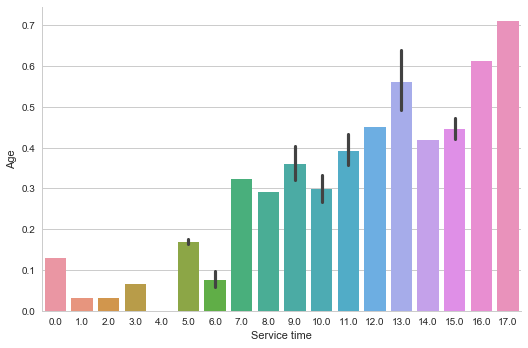

In [80]:
sns.factorplot(x="Service time",y="Age",data=Absenteeism_at_work,kind='bar',size=5,aspect=1.5)

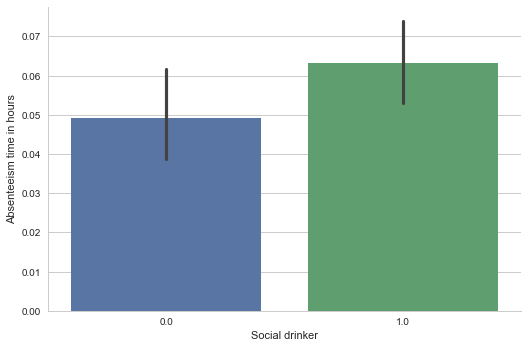

In [83]:
sns.factorplot(x="Social drinker",y="Absenteeism time in hours",data=Absenteeism_at_work,kind='bar',size=5,aspect=1.5)

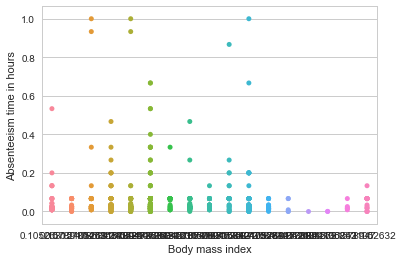

In [71]:
sns.stripplot(x="Body mass index", y="Absenteeism time in hours", data=Absenteeism_at_work);
plt.savefig('Body mass index.png')

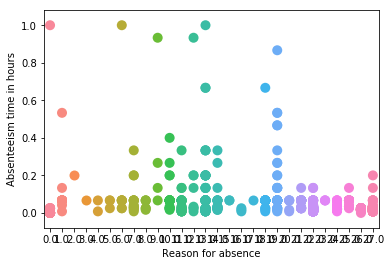

In [77]:
sns.stripplot(x="Reason for absence", y="Absenteeism time in hours", data=Absenteeism_at_work,size = 10);
plt.savefig('Reason for absence.png')

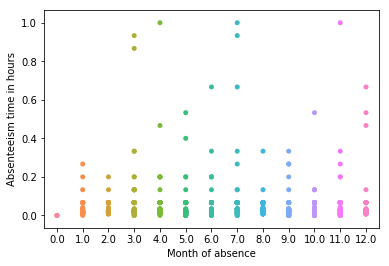

In [41]:
sns.stripplot(x="Month of absence", y="Absenteeism time in hours", data=Absenteeism_at_work);
plt.savefig('Month of absence.png')

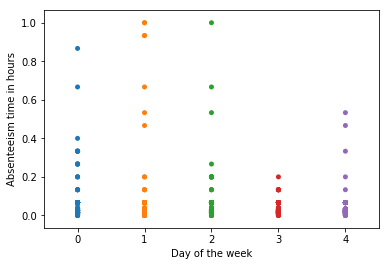

In [42]:
sns.stripplot(x="Day of the week", y="Absenteeism time in hours", data=Absenteeism_at_work);
plt.savefig('Day of the week.png')

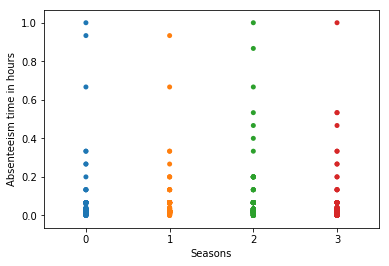

In [43]:
sns.stripplot(x="Seasons", y="Absenteeism time in hours", data=Absenteeism_at_work);
plt.savefig('Seasons.png')

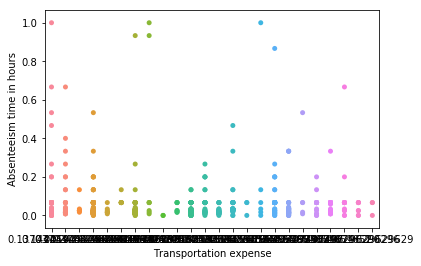

In [44]:
sns.stripplot(x="Transportation expense", y="Absenteeism time in hours", data=Absenteeism_at_work);
plt.savefig('Transportation expense.png')

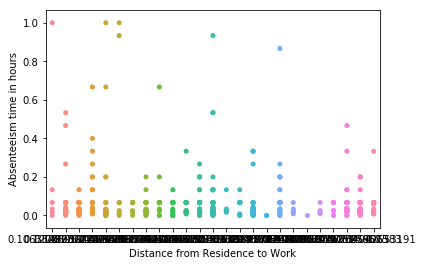

In [45]:
sns.stripplot(x="Distance from Residence to Work", y="Absenteeism time in hours", data=Absenteeism_at_work);
plt.savefig('Distance from Residence to Work.png')

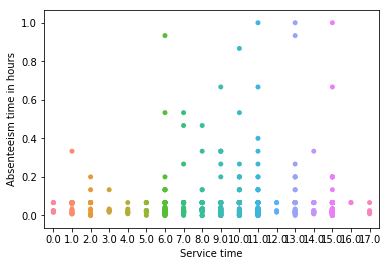

In [46]:
sns.stripplot(x="Service time", y="Absenteeism time in hours", data=Absenteeism_at_work);
plt.savefig('Service time.png')

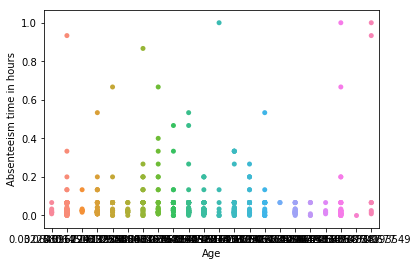

In [47]:
sns.stripplot(x="Age", y="Absenteeism time in hours", data=Absenteeism_at_work);
plt.savefig('Age.png')

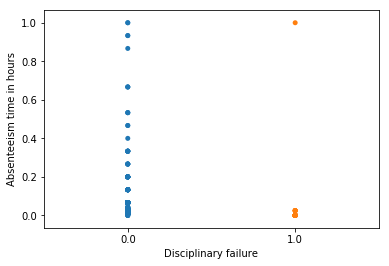

In [48]:
sns.stripplot(x="Disciplinary failure", y="Absenteeism time in hours", data=Absenteeism_at_work);
plt.savefig('Disciplinary failure.png')

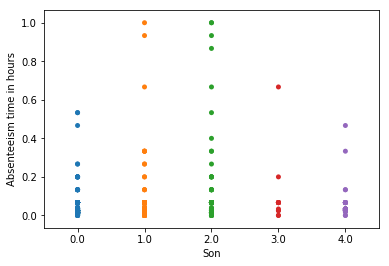

In [49]:
sns.stripplot(x="Son", y="Absenteeism time in hours", data=Absenteeism_at_work);
plt.savefig('Son.png')

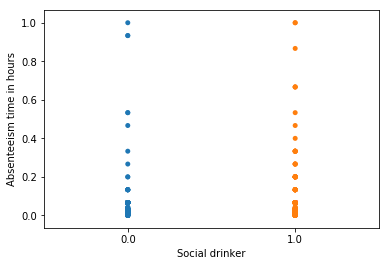

In [50]:
sns.stripplot(x="Social drinker", y="Absenteeism time in hours", data=Absenteeism_at_work);
plt.savefig('Social drinker.png')

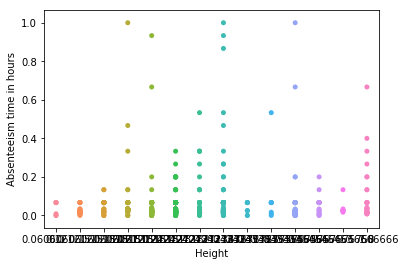

In [51]:
sns.stripplot(x="Height", y="Absenteeism time in hours", data=Absenteeism_at_work);
plt.savefig('Height.png')